# enzyme kinetics

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os

plt.style.use(['science', 'grid', 'vibrant'])

## importing data

In [5]:
file = 'Lab data Fall 2024.xlsx'
data = pd.read_excel(file, sheet_name='Group C', skiprows = 2)
data.columns = data.iloc[0]
data = data[1:]
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    
data


,Time (s),Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 8,Sample 9,Sample 10,Sample 11,Sample 12
1,0,0.084753,0.069625,0.121017,0.106576,0.081230,0.003778,0.038773,0.029922,0.030767,0.035608
2,5,0.131655,0.128207,0.195042,0.169010,0.150518,0.007555,0.077546,0.059844,0.061533,0.071216
3,10,0.175052,0.184816,0.261282,0.236230,0.212905,0.013744,0.108454,0.092901,0.096876,0.107210
4,15,0.213010,0.238464,0.318547,0.285484,0.272881,0.020783,0.138223,0.124052,0.130821,0.140953
5,20,0.246698,0.293801,0.381875,0.343065,0.328543,0.028359,0.166614,0.153133,0.163687,0.174840
6,25,0.276114,0.351434,0.434975,0.389612,0.381946,0.035836,0.193034,0.182269,0.195689,0.207147
7,30,0.304181,0.400658,0.487073,0.427276,0.432493,0.043156,0.219796,0.210773,0.226502,0.238358
8,35,0.330274,0.438376,0.534570,0.475605,0.479472,0.049952,0.245431,0.238024,0.256153,0.267401
9,40,0.354224,0.475094,0.578429,0.527837,0.524055,0.057221,0.270948,0.264204,0.284361,0.297418
10,45,0.377473,0.514319,0.619632,0.575081,0.568206,0.064226,0.295124,0.289862,0.312422,0.326360


## analysis

In [6]:
extracted = pd.DataFrame()

# calculating lactate concentrations
total_volume = 1.75 #mL

lactate_volumes = [0.05, 0.25, 0.50, 0.75, 1.00] #mL
lactate_molarity = 150 #mM

lactate_concentrations = [lactate_molarity * volume / total_volume for volume in lactate_volumes]

extracted['Lactate (mM)'] = lactate_concentrations
extracted['V (no inhibitor)'] = np.nan
extracted['V (inhibitor)'] = np.nan

0 y = 0.004x + 0.16, $R^2$ = 0.96
1 y = 0.007x + 0.16, $R^2$ = 0.98
2 y = 0.007x + 0.24, $R^2$ = 0.97
3 y = 0.008x + 0.19, $R^2$ = 0.98
4 y = 0.008x + 0.17, $R^2$ = 0.98


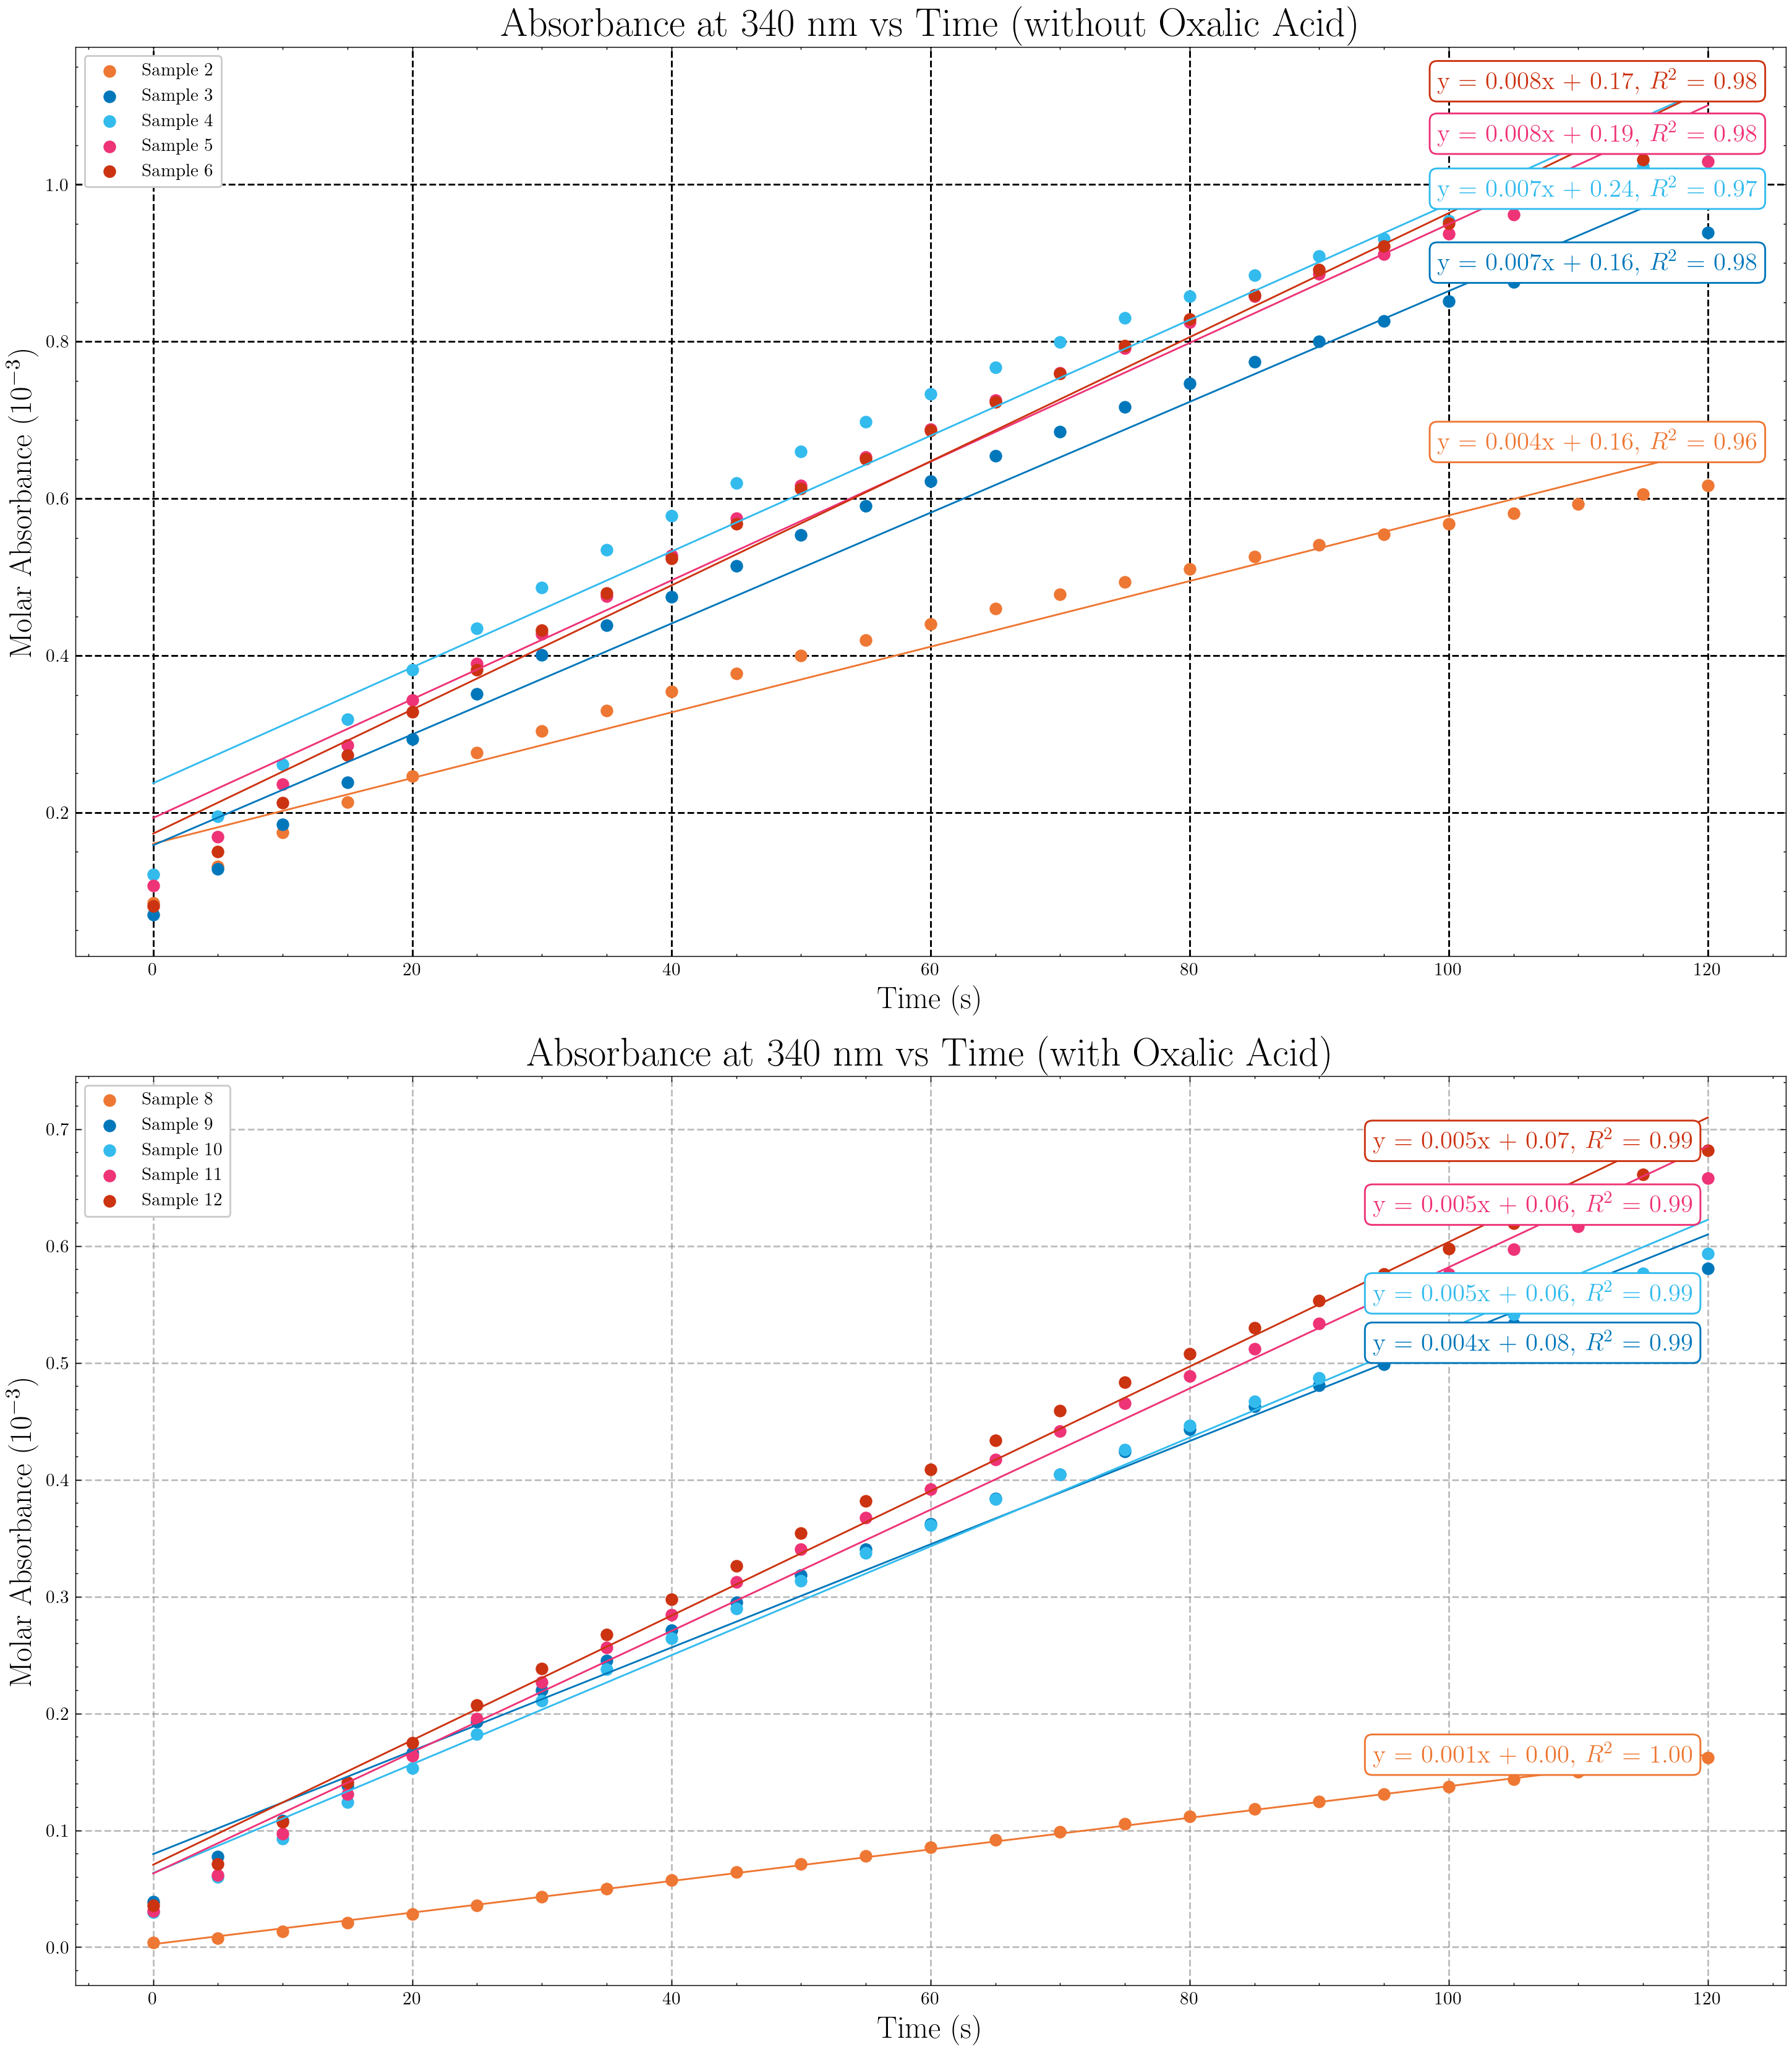

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

times = data['Time (s)'].values.reshape(-1, 1)

fig, ax = plt.subplots(2, 1, figsize=(14, 16), dpi = 210)


for sample in data.columns[1:]:
    absorbance = data[sample].values
    
    index = (data.columns.get_loc(sample) - 1) % 5 
    #index = (data.columns.get_loc(sample) % 5 - 1) if data.columns.get_loc(sample) % 5 != 0 else 4

    model = LinearRegression()
    model.fit(times, absorbance)
    
    slope = model.coef_[0]
    intercept = model.intercept_
    prediction = model.predict(times)

    r2 = r2_score(data[sample], prediction)
    
    label = f'y = {slope:.3f}x + {intercept:.2f}, $R^{2}$ = {r2:.2f}'


    if pd.isna(extracted.loc[index, 'V (no inhibitor)']):
        extracted.loc[index, 'V (no inhibitor)'] = slope
    else:
        extracted.loc[index, 'V (inhibitor)'] = slope
        
    n = index%2

    y1 = -60 if index == 2 else 0
    y2 = 30 if index == 3 else 0
    
    y3 = -30 if index == 2 else 0
    y4 = 30 if index == 3 else 0
        
    if data.columns.get_loc(sample) < 6:
        
        ax[0].scatter(times, absorbance, label=f'{sample}')
        line, = ax[0].plot(times, prediction)
        color = line.get_color()

        ax[0].annotate(label,
                     xy=(times[-1], prediction[-1]),
                     xytext=(-150, -50*n + y1 + y2),
                       color = color,
                     textcoords='offset points',
                     fontsize=14,
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor = color, facecolor="white"))
        
        print(index, label)
        
    else:
        ax[1].scatter(times, absorbance, label=f'{sample}')
        line, = ax[1].plot(times, prediction)
        color = line.get_color()

        ax[1].annotate(label,
                       xy=(times[-2], prediction[-2]),
                       xytext=(-150, -50*n + y3 + y4),
                       color = color,
                       textcoords='offset points',
                       fontsize=14,
                       bbox=dict(boxstyle="round,pad=0.3", edgecolor = color, facecolor="white"))
        


ax[0].set_title('Absorbance at 340 nm vs Time (without Oxalic Acid)', fontsize=22)
ax[1].set_title('Absorbance at 340 nm vs Time (with Oxalic Acid)', fontsize=22)
ax[0].set_xlabel('Time (s)', fontsize=17)
ax[1].set_xlabel('Time (s)', fontsize=17)
ax[0].set_ylabel('Molar Absorbance ($10^{-3}$)', fontsize=17)
ax[1].set_ylabel('Molar Absorbance ($10^{-3}$)', fontsize=17)
ax[0].legend()
ax[1].legend()
plt.grid(color = 'gray', alpha = 0.5)
plt.tight_layout()
plt.savefig('/Users/fomo/Desktop/absorbance_vs_time.png')

In [8]:
extracted['1/substrate'] = 1 / extracted['Lactate (mM)']
extracted['1/V'] = 1 / extracted['V (no inhibitor)']
extracted['1/Vi'] = 1 / extracted['V (inhibitor)']
extracted


,Lactate (mM),V (no inhibitor),V (inhibitor),1/substrate,1/V,1/Vi
0,4.285714,0.004182,0.001352,0.233333,239.135833,739.840174
1,21.428571,0.007060,0.004417,0.046667,141.646605,226.373521
2,42.857143,0.007377,0.004657,0.023333,135.555275,214.718288
3,64.285714,0.007564,0.005187,0.015556,132.199993,192.785232
4,85.714286,0.007905,0.005328,0.011667,126.509969,187.694419


## plotting lineweaver-burk plot

[0.2999] [272.02807032]
[0.2999] [902.8932329]


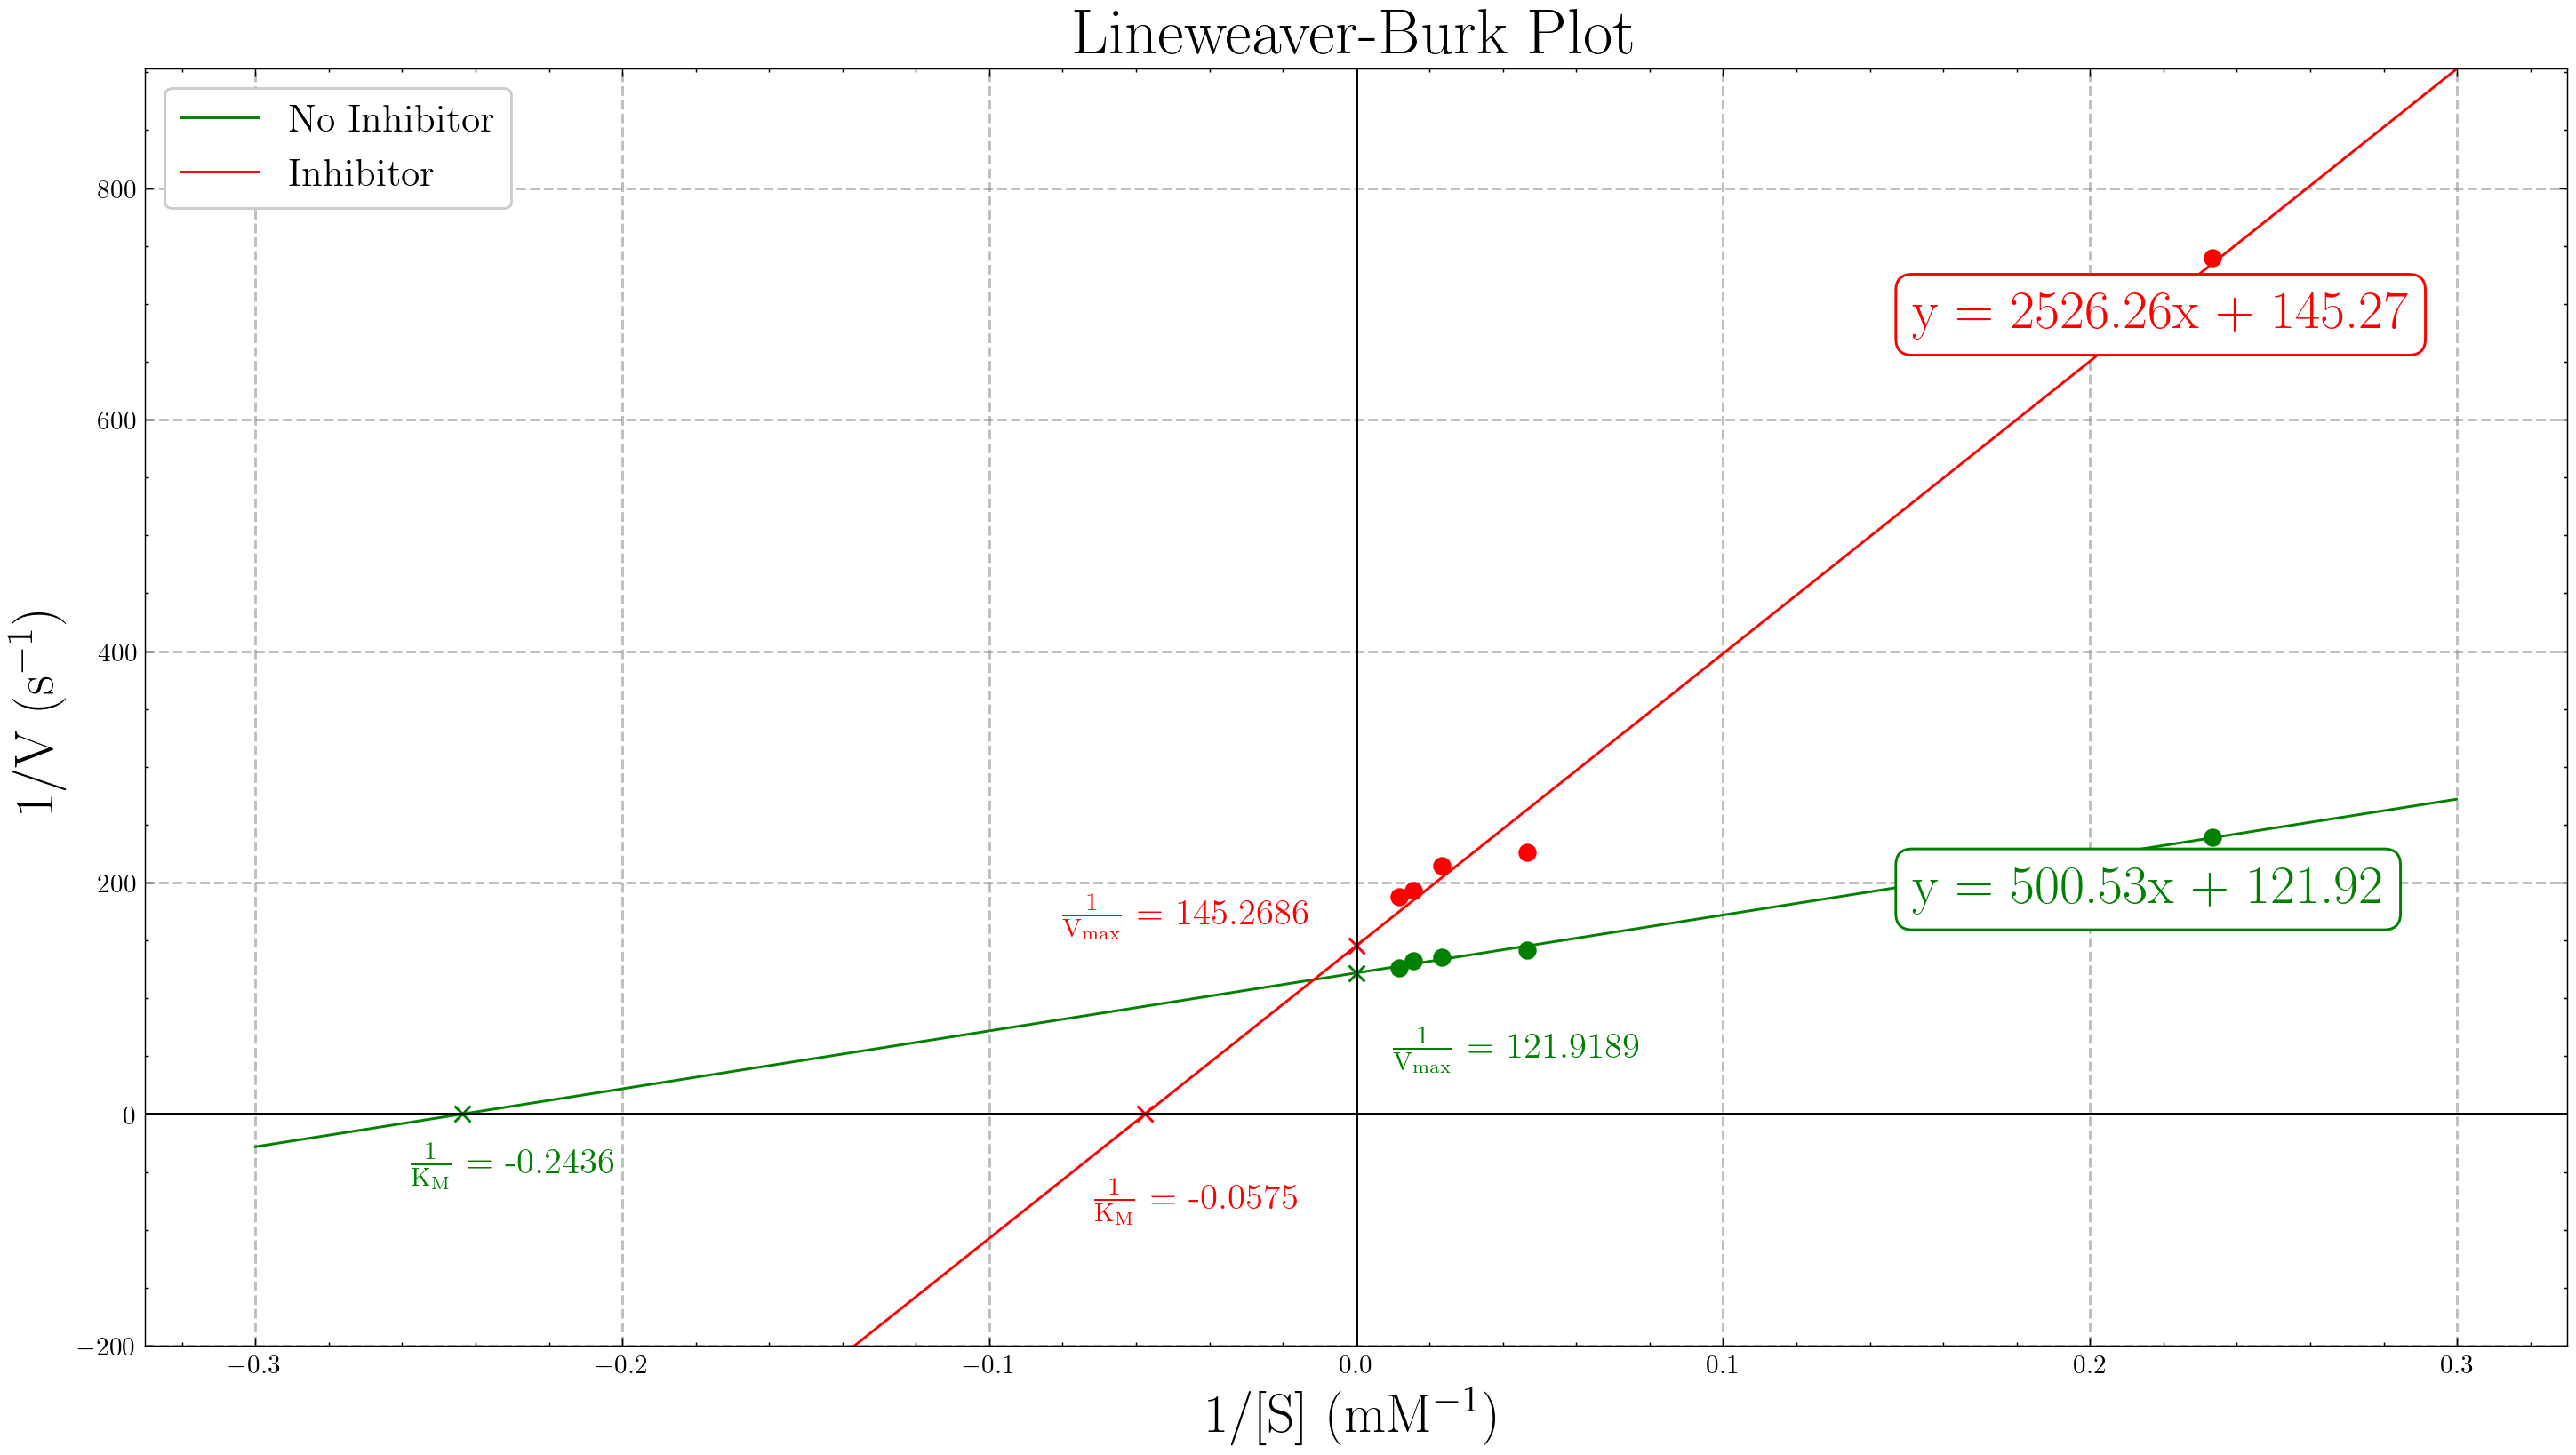

In [108]:
plt.figure(figsize=(14, 8), dpi = 210)

extended = np.arange(-0.3, 0.3, 0.0001).reshape(-1, 1) # to view the intercepts

# no inhibitor
color_one = 'green'

plt.scatter(extracted['1/substrate'], extracted['1/V'], color = color_one)

model_one = LinearRegression()
model_one.fit(extracted['1/substrate'].values.reshape(-1, 1), extracted['1/V'].values.reshape(-1, 1))
slope_one = model_one.coef_[0][0]
intercept_one = model_one.intercept_[0]
label_one = f'y = {slope_one:.2f}x + {intercept_one:.2f}'

prediction_one = model_one.predict(extended)

V_max = 1 / intercept_one
K_M = V_max * slope_one

plt.plot(extended, prediction_one, label='No Inhibitor', color = color_one)
plt.annotate(label_one,
             xy=(extended[-1], prediction_one[-1]),
             xytext=(-210, -40),
             textcoords='offset points',
             color=color_one,
             fontsize=21,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor=color_one, facecolor="white"))

prediction_one = np.array(prediction_one)
x_intercept_one = np.argmin(np.abs(prediction_one[:, 0]))
K_Mx = -1/extended[x_intercept_one]

plt.plot(0, 1/V_max, 'x', color = color_one)
plt.text(0.01, 50, r'$\frac{1}{\text{V}_{\text{max}}}$' + f' = {1 / V_max:.4f}', fontsize=14, color = color_one)
plt.plot(-1/K_M, 0, 'x', color = color_one)
plt.text(-1 / K_M - 0.014, -50, r'$\frac{1}{\text{K}_{\text{M}}}$' + f' = {-1/K_M:.4f}', fontsize=14, color=color_one)

# with inhibitor
color_two = 'red'

plt.scatter(extracted['1/substrate'], extracted['1/Vi'], color = color_two)

model_two = LinearRegression()
model_two.fit(extracted['1/substrate'].values.reshape(-1, 1), extracted['1/Vi'].values.reshape(-1, 1))
slope_two = model_two.coef_[0][0]
intercept_two = model_two.intercept_[0]
label_two = f'y = {slope_two:.2f}x + {intercept_two:.2f}'

prediction_two = model_two.predict(extended)

V_maxi = 1 / intercept_two
K_Mi = V_maxi * slope_two

print(extended[-1], prediction_one[-1])
print(extended[-1], prediction_two[-1])

plt.plot(extended, prediction_two, label=f'Inhibitor', color = color_two)
plt.annotate(label_two,
             xy=(extended[-1], prediction_two[-1]),
             xytext=(-210, -100),
             textcoords='offset points',
             color=color_two,
             fontsize=21,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor=color_two, facecolor="white"))

prediction_two = np.array(prediction_two)
x_intercept_two = np.argmin(np.abs(prediction_two[:, 0]))
K_Mxi = -1/extended[x_intercept_two]

plt.plot(0, 1/V_maxi, 'x', color = color_two)
plt.text(-0.08, 165, r'$\frac{1}{\text{V}_{\text{max}}}$' + f' = {1 / V_maxi:.4f}', fontsize=14, color = color_two)
plt.plot(-1/K_Mi, 0, 'x', color = color_two)
plt.text(-1/K_Mi - 0.014, -81, r'$\frac{1}{\text{K}_{\text{M}}}$' + f' = {-1/K_Mi:.4f}', fontsize=14, color=color_two)

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

plt.legend(fontsize=15)
plt.xlabel('1/[S] (mM$^{-1}$)', fontsize = 21)
plt.ylabel('1/V (s$^{-1}$)', fontsize = 21)
plt.grid(color = 'gray', alpha = 0.5)

plt.ylim(-200, 903)
plt.title('Lineweaver-Burk Plot', fontsize = 25)
plt.tight_layout()
plt.savefig('/Users/fomo/Desktop/lineweaver_burk.png')

In [110]:
K_i = 100/((K_Mi/K_M) - 1)
K_i

30.90328319344661

In [63]:
from tabulate import tabulate


data = [
    ["Parameter", "Absence of Oxalic Acid", "Presence of Oxalic Acid"],
    ["Slope", f"{slope_one:.5f}", f"{slope_two}"],
    ["Intercept", f"{intercept_one:.5f}", f"{intercept_two}"],
    ["Maximum Reaction Velocity (1/y-Intercept)", f"{V_max}", f"{V_maxi}"],
    ["Michaelis Constant (Slope*V_max)", f"{K_M}", f"{K_Mi}"],
    ["Michaelis Constant (-1/x-intercept)", f"{K_Mx[0]}", f"{K_Mxi[0]}"]
]

# Display table
print(tabulate(data, headers="firstrow", tablefmt="simple"))



Parameter                                    Absence of Oxalic Acid    Presence of Oxalic Acid
-----------------------------------------  ------------------------  -------------------------
Slope                                                  500.531                    2526.26
Intercept                                              121.919                     145.269
Maximum Reaction Velocity (1/y-Intercept)                0.00820217                  0.0068838
Michaelis Constant (Slope*V_max)                         4.10544                    17.3902
Michaelis Constant (-1/x-intercept)                      4.10509                    17.3913
